<a href="https://colab.research.google.com/github/Hari-Priya-18/Image-denoising/blob/main/rad_hdr_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.0/249.0 kB 7.6 MB/s eta 0:00:00
Image shape (rows, cols, bands): (512, 512, 1)


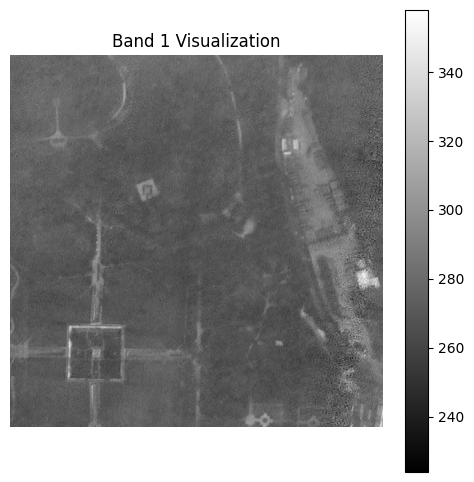

In [1]:
# Step 1: Install required library
!pip install spectral

# Step 2: Import required packages
import spectral
import matplotlib.pyplot as plt
import os

# Step 3: Make sure both .hdr and .rad files exist
hdr_path = '/content/band1_image2.rad.hdr'
bin_path = '/content/band1_image2.rad'  # Rename the binary .rad file to match this name

# Check if the .rad binary exists. If not, rename one of your previous uploads
if not os.path.exists(bin_path):
    # You can use the most recent binary .rad uploaded earlier and rename it to match
    import shutil
    shutil.copy('/mnt/data/98e8ab72-2e33-4532-a622-063d39464ff9.rad', bin_path)

# Step 4: Load the image using spectral
img = spectral.open_image(hdr_path)
img_data = img.load()

# Step 5: Print shape and plot the first band
print("Image shape (rows, cols, bands):", img.shape)

# Extract the first band (assuming it's a 3D cube: rows × cols × bands)
band_1 = img_data[:, :, 0]

# Step 6: Display using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(band_1, cmap='gray')
plt.title("Band 1 Visualization")
plt.axis('off')
plt.colorbar()
plt.show()


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float, restoration

# Step 1: Load the image
img_path = '/content/rad_hdr_2.png'
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
image = img_as_float(image)

# Step 2: Apply denoising techniques

# A. Gaussian Blur
gaussian = cv2.GaussianBlur(image, (5, 5), sigmaX=1)

# B. Median Filter
median = cv2.medianBlur((image * 255).astype(np.uint8), 5)
median = img_as_float(median)

# C. Bilateral Filter
bilateral = cv2.bilateralFilter((image * 255).astype(np.uint8), 9, 75, 75)
bilateral = img_as_float(bilateral)

# D. Non-local Means Denoising
nl_means = restoration.denoise_nl_means(image, h=0.1, fast_mode=True, patch_size=5, patch_distance=6)

# Step 3: Plot original and denoised images
titles = ['Original', 'Gaussian', 'Median', 'Bilateral', 'Non-Local Means']
images = [image, gaussian, median, bilateral, nl_means]

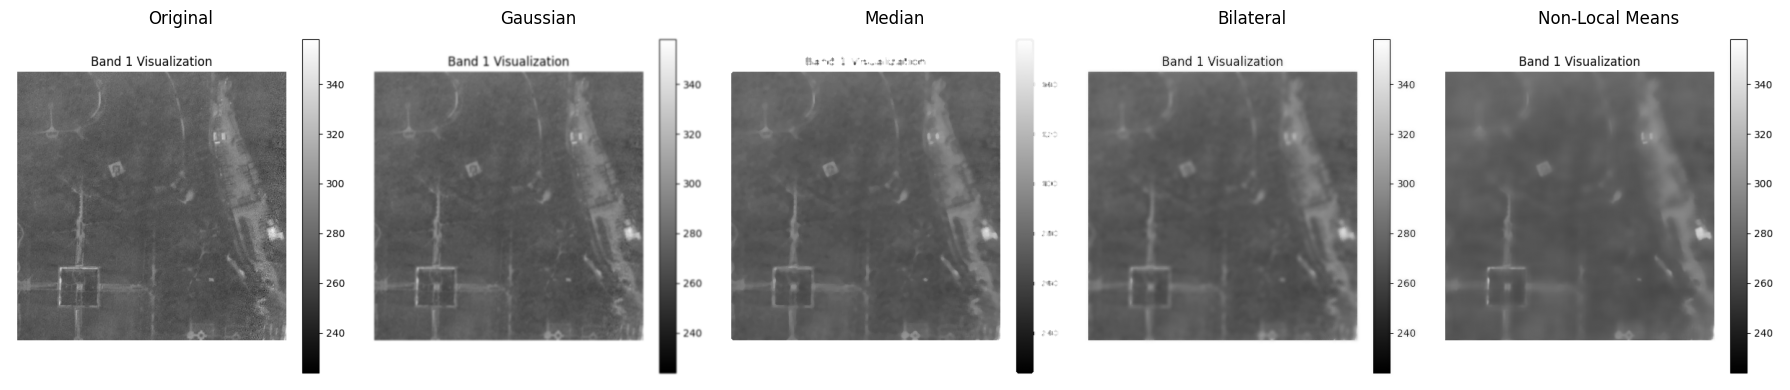

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float, restoration

# Step 1: Load the image (Grayscale)
img_path = '/content/rad_hdr_2.png'  # Update if image is in another location
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
image = img_as_float(image)

# Step 2: Apply Denoising Techniques

# Gaussian Blur
gaussian = cv2.GaussianBlur(image, (5, 5), sigmaX=1)

# Median Filter
median = cv2.medianBlur((image * 255).astype(np.uint8), 5)
median = img_as_float(median)

# Bilateral Filter
bilateral = cv2.bilateralFilter((image * 255).astype(np.uint8), 9, 75, 75)
bilateral = img_as_float(bilateral)

# Non-Local Means
nl_means = restoration.denoise_nl_means(image, h=0.1, fast_mode=True, patch_size=5, patch_distance=6)

# Step 3: Visualization
titles = ['Original', 'Gaussian', 'Median', 'Bilateral', 'Non-Local Means']
images = [image, gaussian, median, bilateral, nl_means]

plt.figure(figsize=(18, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [9]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.restoration import denoise_nl_means, denoise_tv_chambolle
import matplotlib.pyplot as plt

# ✅ Step 1: Load the original (noisy) image
original = cv2.imread('/content/rad_hdr_2.png', cv2.IMREAD_GRAYSCALE)

# ✅ Step 2: Apply denoising filters
gaussian = cv2.GaussianBlur(original, (5, 5), 1)
median = cv2.medianBlur(original, 5)
bilateral = cv2.bilateralFilter(original, 9, 75, 75)
nlm = denoise_nl_means(original, h=0.8 * original.std(), fast_mode=True)
nlm = (nlm * 255).astype(np.uint8)  # Convert back to 8-bit
tv = denoise_tv_chambolle(original, weight=0.1)
tv = (tv * 255).astype(np.uint8)

# ✅ Step 3: PSNR function
def calculate_psnr(original, denoised):
    return psnr(original, denoised, data_range=original.max() - original.min())

# ✅ Step 4: Calculate PSNR
psnr_gaussian = calculate_psnr(original, gaussian)
psnr_median = calculate_psnr(original, median)
psnr_bilateral = calculate_psnr(original, bilateral)
psnr_nlm = calculate_psnr(original, nlm)
psnr_tv = calculate_psnr(original, tv)

# ✅ Step 5: Show PSNR values
print("PSNR values (compared to original):")
print(f"Gaussian Blur:    {psnr_gaussian:.2f} dB")
print(f"Median Blur:      {psnr_median:.2f} dB")
print(f"Bilateral Filter: {psnr_bilateral:.2f} dB")
print(f"NLM Denoising:    {psnr_nlm:.2f} dB")
print(f"Total Variation:  {psnr_tv:.2f} dB")


PSNR values (compared to original):
Gaussian Blur:    25.48 dB
Median Blur:      23.02 dB
Bilateral Filter: 32.49 dB
NLM Denoising:    18.74 dB
Total Variation:  31.40 dB


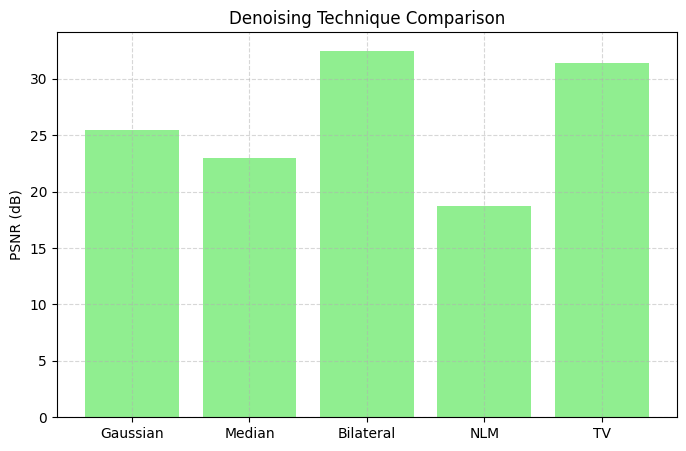

In [10]:
methods = ['Gaussian', 'Median', 'Bilateral', 'NLM', 'TV']
psnr_values = [psnr_gaussian, psnr_median, psnr_bilateral, psnr_nlm, psnr_tv]

plt.figure(figsize=(8, 5))
plt.bar(methods, psnr_values, color='lightgreen')
plt.ylabel("PSNR (dB)")
plt.title("Denoising Technique Comparison")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
